<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo/Classifier%20-%20Caltech-256%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## Install Monk


## Using pretrained model for classifying caltech-256 dataset images


## Training a classifier from scratch

<a id='0'></a>
# Install Monk

## Using pip (Recommended)

  - colab (gpu) 
      - All bakcends: `pip install -U monk-colab`
      

  - kaggle (gpu) 
      - All backends: `pip install -U monk-kaggle`
      

  - cuda 10.2	
      - All backends: `pip install -U monk-cuda102`
      - Gluon bakcned: `pip install -U monk-gluon-cuda102`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda102`
      - Keras backend: `pip install -U monk-keras-cuda102`
      

  - cuda 10.1	
      - All backend: `pip install -U monk-cuda101`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda101`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda101`
	  - Keras backend: `pip install -U monk-keras-cuda101`
      

  - cuda 10.0	
      - All backend: `pip install -U monk-cuda100`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda100`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda100`
	  - Keras backend: `pip install -U monk-keras-cuda100`
      

  - cuda 9.2	
      - All backend: `pip install -U monk-cuda92`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda92`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda92`
	  - Keras backend: `pip install -U monk-keras-cuda92`
      

  - cuda 9.0	
      - All backend: `pip install -U monk-cuda90`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda90`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda90`
	  - Keras backend: `pip install -U monk-keras-cuda90`
      

  - cpu 		
      - All backend: `pip install -U monk-cpu`
	  - Gluon bakcned: `pip install -U monk-gluon-cpu`
	  - Pytorch backend: `pip install -U monk-pytorch-cpu`
	  - Keras backend: `pip install -U monk-keras-cpu`

## Install Monk Manually (Not recommended)
 
### Step 1: Clone the library
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 
 
 
### Step 2: Install requirements 
 - Linux
     - Cuda 9.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt`
     - Cuda 9.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt`
     - Cuda 10.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt`
     - Cuda 10.1
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt`
     - Cuda 10.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt`
 
 
  - Windows
     - Cuda 9.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt`
     - Cuda 9.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt`
     - Cuda 10.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt`
     - Cuda 10.1 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt`
     - Cuda 10.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt`
         
         
  - Mac
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt`
         
         
  - Misc
      - Colab (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_colab.txt`
      - Kaggle (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt`
 
 
 
### Step 3: Add to system path (Required for every terminal or kernel run)
 - `import sys`
 - `sys.path.append("monk_v1/");`

# Used trained classifier for demo

In [1]:
#Using pytorch backend 

# When installed using pip
from monk.pytorch_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");
#from monk.pytorch_prototype import prototype

In [2]:
# Download trained weights

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1t88Owwp_mbBBbrlbzmDG5Q0ya8ONia6u' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1t88Owwp_mbBBbrlbzmDG5Q0ya8ONia6u" -O cls_caltech256_trained.zip && rm -rf /tmp/cookies.txt

In [4]:
! unzip -qq cls_caltech256_trained.zip 

In [5]:
ls workspace/Project-Caltech-256

Pytorch-Shufflenet_0_5/  Pytorch-Shufflenet_1_0/  Pytorch-Shufflenet_1_5/


In [6]:
# Load project in inference mode

gtf = prototype(verbose=1);
gtf.Prototype("Project-Caltech-256", "Pytorch-Shufflenet_0_5", eval_infer=True);

#Other trained models - uncomment 
#gtf.Prototype("Project-Caltech-256", "Pytorch-Shufflenet_1_0", eval_infer=True);
#gtf.Prototype("Project-Caltech-256", "Pytorch-Shufflenet_1_5", eval_infer=True);

Pytorch Version: 1.4.0

Model Details
    Loading model - workspace/Project-Caltech-256/Pytorch-Shufflenet_0_5/output/models/final
    Model loaded!

Experiment Details
    Project: Project-Caltech-256
    Experiment: Pytorch-Shufflenet_0_5
    Dir: /home/ubuntu/Desktop/cls/workspace/Project-Caltech-256/Pytorch-Shufflenet_0_5/



In [7]:
# Infer

Prediction
    Image name:         workspace/test/test1.jpg
    Predicted class:      001.ak47
    Predicted score:      0.9846861958503723



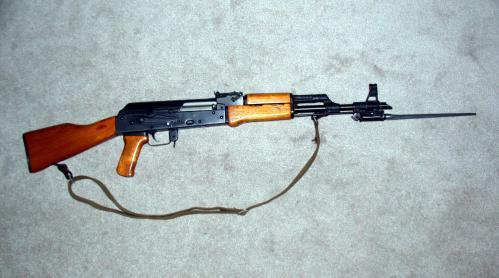

In [8]:
img_name = "workspace/test/test1.jpg"
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name) 

Prediction
    Image name:         workspace/test/test2.jpg
    Predicted class:      007.bat
    Predicted score:      0.9995080232620239



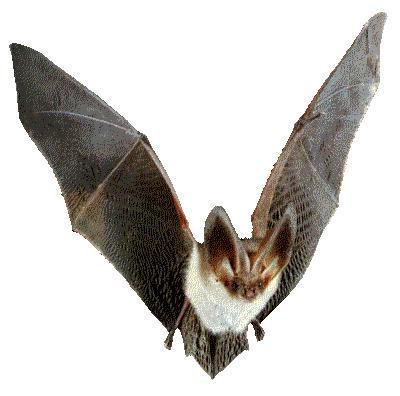

In [9]:
img_name = "workspace/test/test2.jpg"
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name) 

Prediction
    Image name:         workspace/test/test3.jpg
    Predicted class:      091.grand-piano-101
    Predicted score:      0.9990353584289551



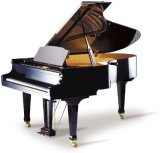

In [10]:
img_name = "workspace/test/test3.jpg"
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name) 

# Training custom classifier from scratch

## Dataset
    - Credits: https://www.kaggle.com/jessicali9530/caltech256

## Download

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Lltrl2U4L8WJkyBjMBFHSaoK8dLhoItl' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Lltrl2U4L8WJkyBjMBFHSaoK8dLhoItl" -O caltech256.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq caltech256.zip

## Training

In [ ]:
# Using mxnet-gluon backend 
#from monk.gluon_prototype import prototype

# For pytorch backend
from monk.pytorch_prototype import prototype

# For Keras backend
#from monk.keras_prototype import prototype

In [ ]:
# Create Project and Experiment

gtf = prototype(verbose=1);
gtf.Prototype("Project-Caltech-256", "Pytorch-Shufflenet");

In [ ]:
gtf.Default(dataset_path="caltech256/train",
            model_name="shufflenet_v2_x0_5", 
            freeze_base_network=False,
            num_epochs=2);

### How to change hyper parameters and models 
  - Docs - https://github.com/Tessellate-Imaging/monk_v1#4
  - Examples - https://github.com/Tessellate-Imaging/monk_v1/tree/master/study_roadmaps/1_getting_started_roadmap

In [ ]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

## Validating on the same dataset

In [ ]:
# Using mxnet-gluon backend 
#from monk.gluon_prototype import prototype

# For pytorch backend
from monk.pytorch_prototype import prototype

# For Keras backend
#from monk.keras_prototype import prototype

In [ ]:
# Create Project and Experiment

gtf = prototype(verbose=1);
gtf.Prototype("Project-Caltech-256", "Pytorch-Shufflenet", eval_infer=True);

In [ ]:
# Load dataset for validaion
gtf.Dataset_Params(dataset_path="caltech256/train");
gtf.Dataset();

In [ ]:
# Run validation
accuracy, class_based_accuracy = gtf.Evaluate();